### The following code is for EIS analysis
1. You can choose which file by selecting in a pop out window
2. You can choose where to save the file in a similar manner for all the programs

#### Takes in file through TK() does it for the different sheets
1. The sheet limits need to be pre set
2. Plots also the last section of each sheet in another image
3. Saves figures
4. If you want to change the magnification or how much margin there is change the variable called margin
5. Name of image is "file name sheetname"

##### Run only if you dont want to verify limits
1. directly generates and saves the plots

2024-07-24 12:58:43.728 Python[26365:1676969] +[CATransaction synchronize] called within transaction
2024-07-24 12:58:43.742 Python[26365:1676969] +[CATransaction synchronize] called within transaction
2024-07-24 12:58:46.208 Python[26365:1676969] +[CATransaction synchronize] called within transaction
2024-07-24 12:59:05.305 Python[26365:1676969] +[CATransaction synchronize] called within transaction


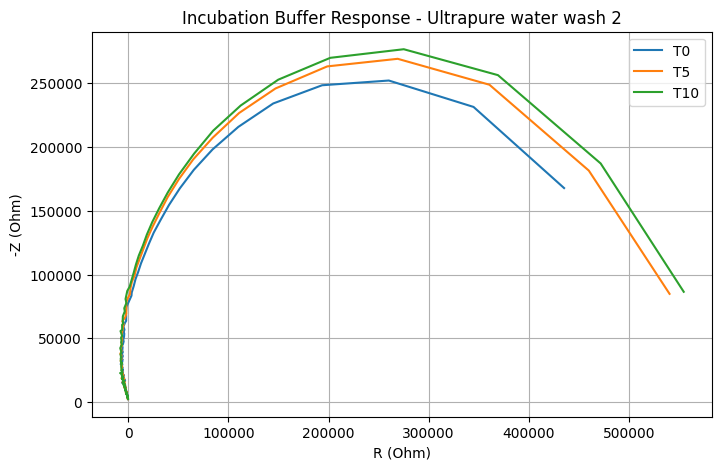

Saved plot for sheet: Ultrapure water wash 2


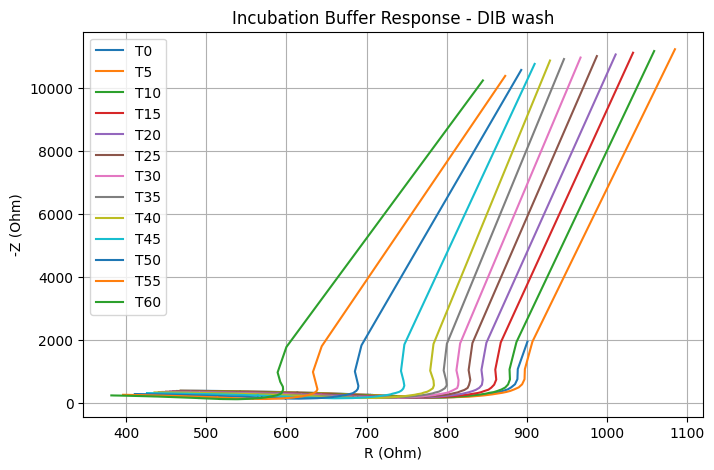

Saved plot for sheet: DIB wash


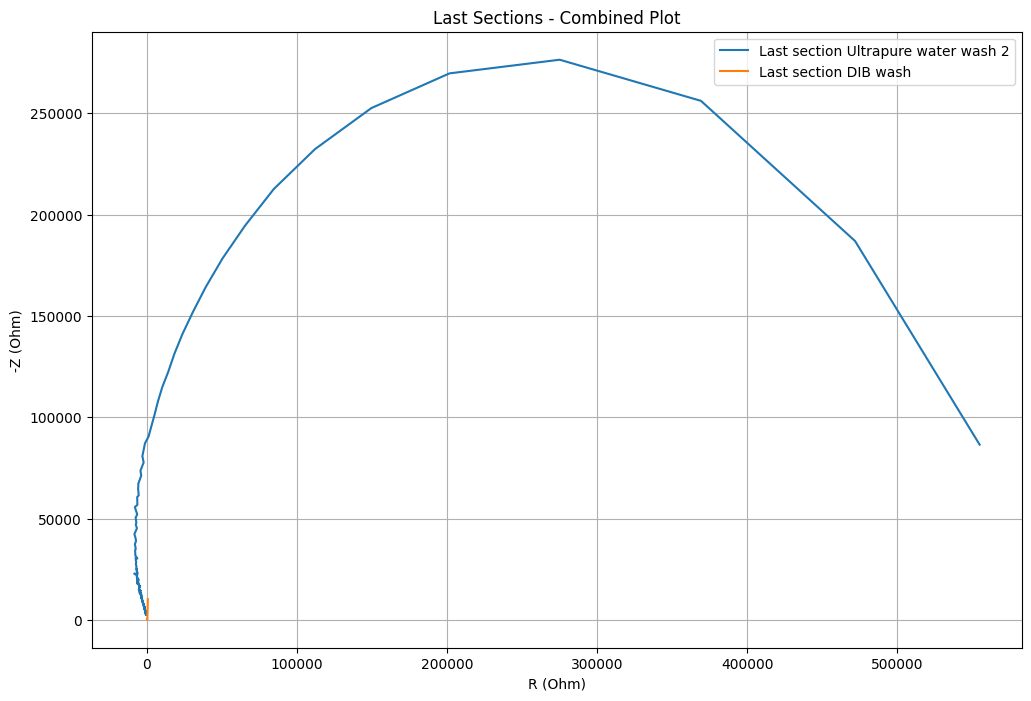

Saved combined plot for the last sections of all sheets.


In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tkinter import filedialog, Tk, Listbox, MULTIPLE, Button, END

# Function to manually load file
def manualloadfile():
    folderpath = "Users\\AcquisitionStation\\OneDrive - DB, Inc\\Documents\\Electrochemistry\\Chip Test"
    root = Tk()
    root.withdraw()  # Hide the root window
    root.filename = filedialog.askopenfilename(
        initialdir=folderpath, 
        title="Select file", 
        filetypes=(("Excel files", "*.xlsx"),("all files", "*.*"))
    )
    root.destroy()
    return root.filename, pd.ExcelFile(root.filename)

# Function to select sheets
def select_sheets(xls):
    root = Tk()
    root.title('Select Sheets')

    listbox = Listbox(root, selectmode=MULTIPLE)
    listbox.pack(padx=10, pady=10)

    for sheet in xls.sheet_names:
        listbox.insert(END, sheet)

    def on_select():
        global selected_sheets
        selected_sheets = [listbox.get(i) for i in listbox.curselection()]
        root.destroy()

    button = Button(root, text='Select', command=on_select)
    button.pack(pady=10)

    root.mainloop()

# Function to select output directory
def select_output_directory():
    root = Tk()
    root.withdraw()  # Hide the root window
    folder_selected = filedialog.askdirectory(title="Select output directory")
    root.destroy()
    return folder_selected

# Load the data
file_path, xls = manualloadfile()

# Extract initial file name without extension
file_name = os.path.splitext(os.path.basename(file_path))[0]

# Select sheets
selected_sheets = []
select_sheets(xls)

# Select output directory
output_directory = select_output_directory()

# Define the default axis limits
default_limits = {'xlim': (0, 1500), 'ylim': (0, 5000)}

# Define the margin
margin = 00

# To store the last sections for the combined plot
last_sections = []

# Loop through each selected sheet in the Excel file
for sheet_name in selected_sheets:
    # Read the sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name)
    
    # Define sections based on frequency ranges (e.g., 100-200000 in increments)
    maxFrequency = 200000
    maxFreqIndices = df.loc[df['Frequency(Hz)'] == maxFrequency].index
    maxFreqIndices = maxFreqIndices.to_numpy()
    maxFreqIndices = np.append(0, maxFreqIndices)

    # Initialize plot
    plt.figure(figsize=(8, 5))

    # Plot each section
    for i, start in enumerate(maxFreqIndices):
        if i == len(maxFreqIndices) - 1:
            break
        section_df = df.iloc[maxFreqIndices[i] + 1:maxFreqIndices[i + 1] + 1]
        
        # Plot the data
        plt.plot(section_df['Rs'], -section_df['X'], '-', label=f'T{i*5}')

    # Set plot labels and title
    plt.xlabel('R (Ohm)')
    plt.ylabel('-Z (Ohm)')
    plt.title(f'Incubation Buffer Response - {sheet_name}')
    plt.legend()
    plt.grid()
    
    # Save the plot as an image
    plt.gcf().savefig(f'{output_directory}/{file_name}_{sheet_name}_incubation_buffer_response.jpeg', dpi=100)
    
    # Show the plot in the kernel
    plt.show()
    
    # Close the plot to free memory and avoid overlap
    plt.close()

    print(f'Saved plot for sheet: {sheet_name}')

    # Plot the last section
    last_section_df = df.iloc[maxFreqIndices[-2] + 1:maxFreqIndices[-1] + 1]

    # Store the last section for the combined plot
    last_sections.append((sheet_name, last_section_df))

# Combined plot for the last sections of all sheets
plt.figure(figsize=(12, 8))

for sheet_name, section_df in last_sections:
    plt.plot(section_df['Rs'], -section_df['X'], '-', label=f'Last section {sheet_name}')
    
# Set combined plot labels and title
plt.xlabel('R (Ohm)')
plt.ylabel('-Z (Ohm)')
plt.title('Last Sections - Combined Plot')
plt.legend()
plt.grid()

# Save the combined plot as an image
plt.gcf().savefig(f'{output_directory}/{file_name}_combined_last_sections.jpeg', dpi=100)

# Show the combined plot in the kernel
plt.show()

print('Saved combined plot for the last sections of all sheets.')


##### Updated - Jul 26
1. this first section allows change in limits that need to be done in the code
2. the limits for all section plots will be the same
3. I suggest you make multiple saves if you need to
4. it generates the RCT vs time plots
5. if you want to change the total time of experiment change the variable "totalTime" to whatever value in minutes
6. it finds the diameter of every section, plots that against the time and find the slope
7. it also plots the equation and r square value
8. to get the list of all slopes and intercepts in a new cell type "slopeList_RCT" or "interceptList_RCT"

2024-07-28 15:44:00.637 Python[46481:2862822] +[CATransaction synchronize] called within transaction
2024-07-28 15:44:00.667 Python[46481:2862822] +[CATransaction synchronize] called within transaction
2024-07-28 15:44:02.446 Python[46481:2862822] +[CATransaction synchronize] called within transaction
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/lib/_polynomial_impl.py:657: RuntimeWarning: invalid value encountered in divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

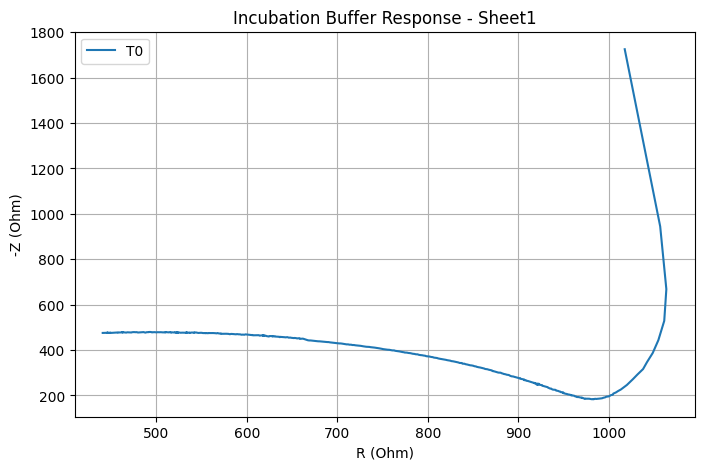

In [23]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tkinter import filedialog, Tk, Listbox, MULTIPLE, Button, END, simpledialog, messagebox, Entry, Label, Button

# Function to manually load file
def manualloadfile():
    folderpath = "Users\\AcquisitionStation\\OneDrive - DB, Inc\\Documents\\Electrochemistry\\Chip Test"
    root = Tk()
    root.withdraw()  # Hide the root window
    root.filename = filedialog.askopenfilename(
        initialdir=folderpath, 
        title="Select file", 
        filetypes=(("Excel files", "*.xlsx"),("all files", "*.*"))
    )
    root.destroy()
    return root.filename, pd.ExcelFile(root.filename)

# Function to select sheets
def select_sheets(xls):
    root = Tk()
    root.title('Select Sheets')

    listbox = Listbox(root, selectmode=MULTIPLE)
    listbox.pack(padx=10, pady=10)

    for sheet in xls.sheet_names:
        listbox.insert(END, sheet)

    def on_select():
        global selected_sheets
        selected_sheets = [listbox.get(i) for i in listbox.curselection()]
        root.destroy()

    button = Button(root, text='Select', command=on_select)
    button.pack(pady=10)

    root.mainloop()

def find_derivative_zero_crossing(x_values):
    """Find the index where the derivative of the x_values crosses zero."""
    dx = np.diff(x_values)
    zero_crossings = np.where(np.diff(np.sign(dx)))[0]
    derivative_zero = df['X'][zero_crossings+1]
    min_value = np.min(-derivative_zero)
    min_index = np.argmin(-derivative_zero)
    resp_idx = zero_crossings[min_index]+ 1
    if len(zero_crossings) == 0:
        return None

    return min_value, resp_idx

# Load the data
file_path, xls = manualloadfile()

# Extract initial file name without extension
file_name = os.path.splitext(os.path.basename(file_path))[0]

# Select sheets
selected_sheets = []
select_sheets(xls)


# Define the default axis limits
default_limits = {'xlim': (0, 1500), 'ylim': (0, 5000)}

# Define the margin
margin = 00

# To store the last sections for the combined plot and plots
last_sections = []
figIncub = []
plotName = []
slopeList_RCT = []
interceptList_RCT = []
totalTime = 30 #total time of experiment

#To store the diameters of each section

# Loop through each selected sheet in the Excel file
for sheet_name in selected_sheets:
    # Read the sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name)
    
    # Define sections based on frequency ranges (e.g., 100-200000 in increments)
    maxFrequency = 200000
    maxFreqIndices = df.loc[df['Frequency(Hz)'] == maxFrequency].index
    maxFreqIndices = maxFreqIndices.to_numpy()
    maxFreqIndices = np.append(0, maxFreqIndices)
    diameters = []

    # Initialize plot
    plt.figure(figsize=(8, 5))

    # Plot each section
    for i, start in enumerate(maxFreqIndices):
        if i == len(maxFreqIndices) - 1:
            break
        section_df = df.iloc[maxFreqIndices[i] + 1:maxFreqIndices[i + 1] + 1]

        # Isolate the last value in the X column
        #last_x_value = section_df['X'].iloc[-1]
        last_x_r_value = section_df['Rs'].iloc[-1]
    
        # Find the derivative zero crossing
        zero_crossing_x_value, zero_crossing_index = find_derivative_zero_crossing(df['X'])
        if zero_crossing_index is not None:
            #zero_crossing_x_value = section_df['X'].iloc[zero_crossing_index]
            zero_crossing_r_value = section_df['Rs'][zero_crossing_index]
        
            # Calculate the difference in R values
            diameter = abs(last_x_r_value - zero_crossing_r_value)
            diameters.append(diameter)
        else:
            diameters.append(None)  # Handle cases where no zero crossing is found

        # Plot the data
        plt.plot(section_df['Rs'], -section_df['X'], '-', label=f'T{i*5}')

    # Set plot labels and title
    plt.xlabel('R (Ohm)')
    plt.ylabel('-Z (Ohm)')
    plt.title(f'Incubation Buffer Response - {sheet_name}')
    plt.legend()
    plt.grid()
    
    # Plotting the results
    x_values = np.linspace(0, totalTime, len(diameters))
    # Calculate the best fit line
    slope, intercept = np.polyfit(x_values, diameters, 1)
    slopeList_RCT.append((sheet_name, slope))
    interceptList_RCT.append((sheet_name, intercept))
    best_fit_line = slope * x_values + intercept
    # Calculate the R^2 value
    residuals = diameters - best_fit_line
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((diameters - np.mean(diameters))**2)
    r_squared = 1 - (ss_res / ss_tot)
        
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, diameters, marker='o', linestyle='-')
    plt.plot(x_values, best_fit_line, color='red', linestyle='--', label=f'Best fit line: y = {slope:.2f}x + {intercept:.2f}\n$R^2$ = {r_squared:.2f}')
    plt.xlabel('Time')
    plt.ylabel('RCT')
    plt.title(f'RCT vs time - {sheet_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    figIncub.append(plt.gcf())
    plotName.append(f'{file_name}_{sheet_name}_RCT_vs_time.jpeg')

    ### IF YOU WANT TO CHANGE THE LIMITS
    ''' Change the limits in the () '''
    '''
    plt.xlim(0, 5000)
    plt.ylim(0, 5000)
    '''
    
    # Save the plot as an image
    figIncub.append(plt.gcf())
    plotName.append(f'{file_name}_{sheet_name}_incubation_buffer_response.jpeg')
    #plt.gcf().savefig(f'{output_directory}/{file_name}_{sheet_name}_incubation_buffer_response.jpeg', dpi=100)
    
    # Show the plot in the kernel
    plt.show()
    
    # Close the plot to free memory and avoid overlap
    plt.close()

    # Plot the last section
    last_section_df = df.iloc[maxFreqIndices[-2] + 1:maxFreqIndices[-1] + 1]

    # Store the last section for the combined plot
    last_sections.append((sheet_name, last_section_df))

# Combined plot for the last sections of all sheets
plt.figure(figsize=(12, 8))

for sheet_name, section_df in last_sections:
    plt.plot(section_df['Rs'], -section_df['X'], '-', label=f'Last section {sheet_name}')
    
# Set combined plot labels and title
plt.xlabel('R (Ohm)')
plt.ylabel('-Z (Ohm)')
plt.title('Last Sections - Combined Plot')
plt.legend()
plt.grid()

### IF YOU WANT TO CHANGE THE LIMITS
''' Change the limits in the () '''
'''
plt.xlim(0, 5000)
plt.ylim(0,5000)
'''

# Save the combined plot as an image
figIncub.append(plt.gcf())
plotName.append(f'{file_name}_combined_last_sections.jpeg')
#plt.gcf().savefig(f'{output_directory}/{file_name}_combined_last_sections.jpeg', dpi=100)

# Show the combined plot in the kernel
plt.show()


###### This saves all the figures

In [2]:
# Function to select output directory
def select_output_directory():
    folderpath = "Users\\AcquisitionStation\\OneDrive - DB, Inc\\Documents\\Electrochemistry\\Chip Test"
    root = Tk()
    root.withdraw()  # Hide the root window
    folder_selected = filedialog.askdirectory(initialdir=folderpath, title="Select output directory")
    root.destroy()
    return folder_selected

# Select output directory
output_directory = select_output_directory()

for i in range(0,len(figIncub)):
    figIncub[i].savefig(f'{output_directory}/{plotName[i]}', dpi=100)

print('Files are saved')

2024-07-26 17:44:12.174 Python[37395:2331763] +[CATransaction synchronize] called within transaction
2024-07-26 17:44:12.199 Python[37395:2331763] +[CATransaction synchronize] called within transaction
2024-07-26 17:44:14.040 Python[37395:2331763] +[CATransaction synchronize] called within transaction


Files are saved


#### Saves only the last sections of each sheet
1. Uses Tk() and saves and plots only the last section
2. Change variable called margin if you want the zoom to be different

2024-07-23 12:36:39.370 Python[23061:1458026] +[CATransaction synchronize] called within transaction
2024-07-23 12:36:39.392 Python[23061:1458026] +[CATransaction synchronize] called within transaction
2024-07-23 12:36:40.533 Python[23061:1458026] +[CATransaction synchronize] called within transaction
2024-07-23 12:36:45.433 Python[23061:1458026] +[CATransaction synchronize] called within transaction


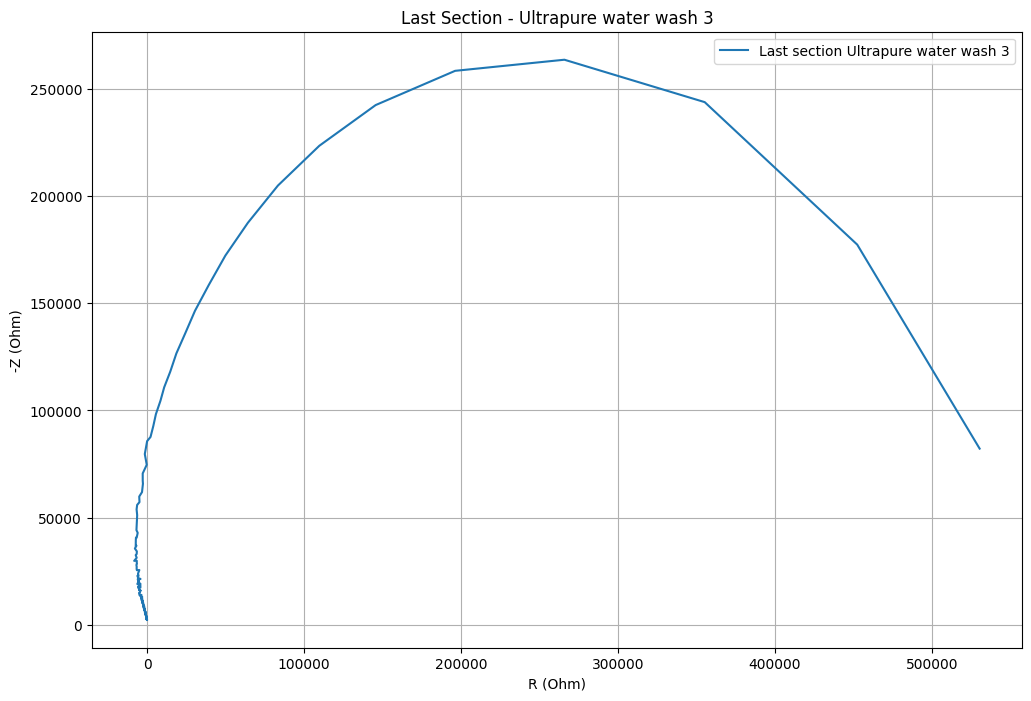

Saved plot for sheet: Ultrapure water wash 3


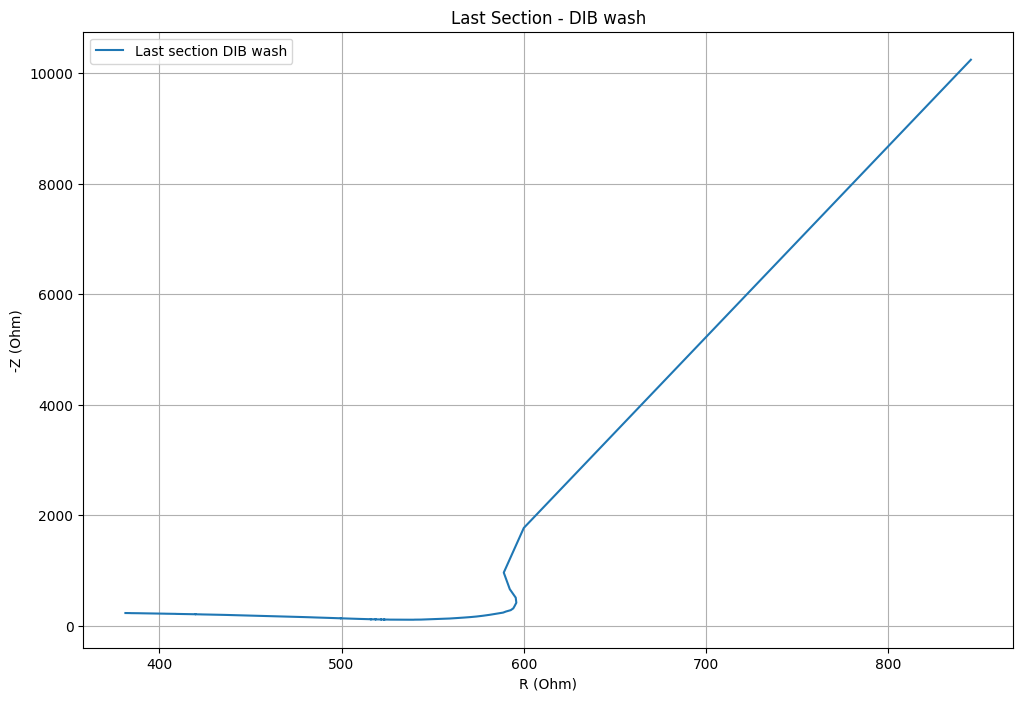

Saved plot for sheet: DIB wash


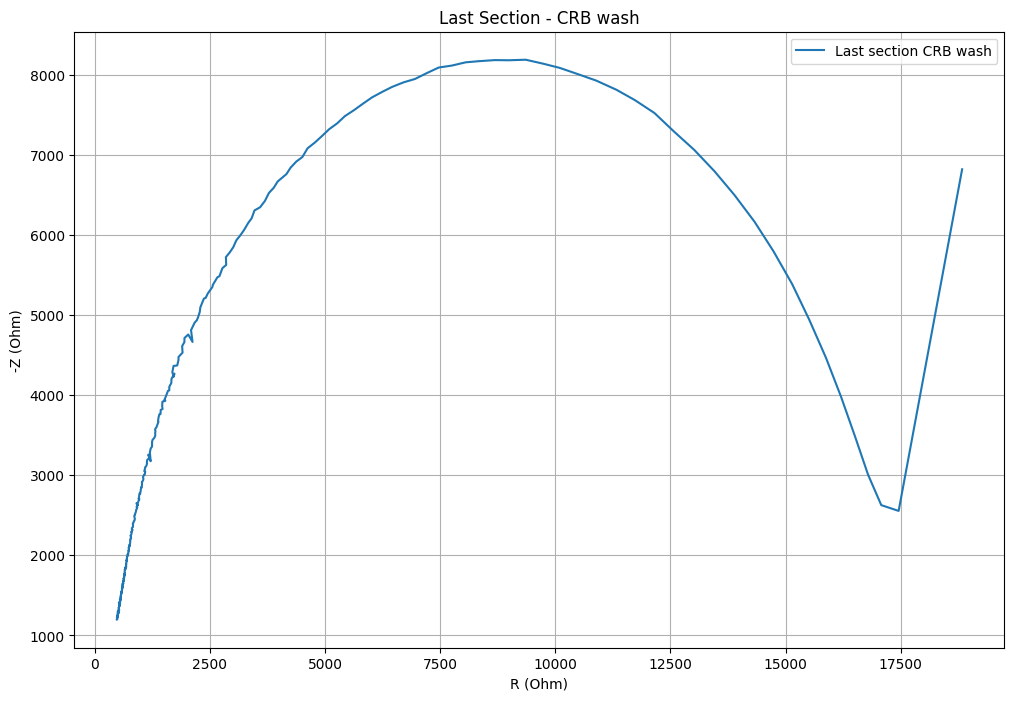

Saved plot for sheet: CRB wash


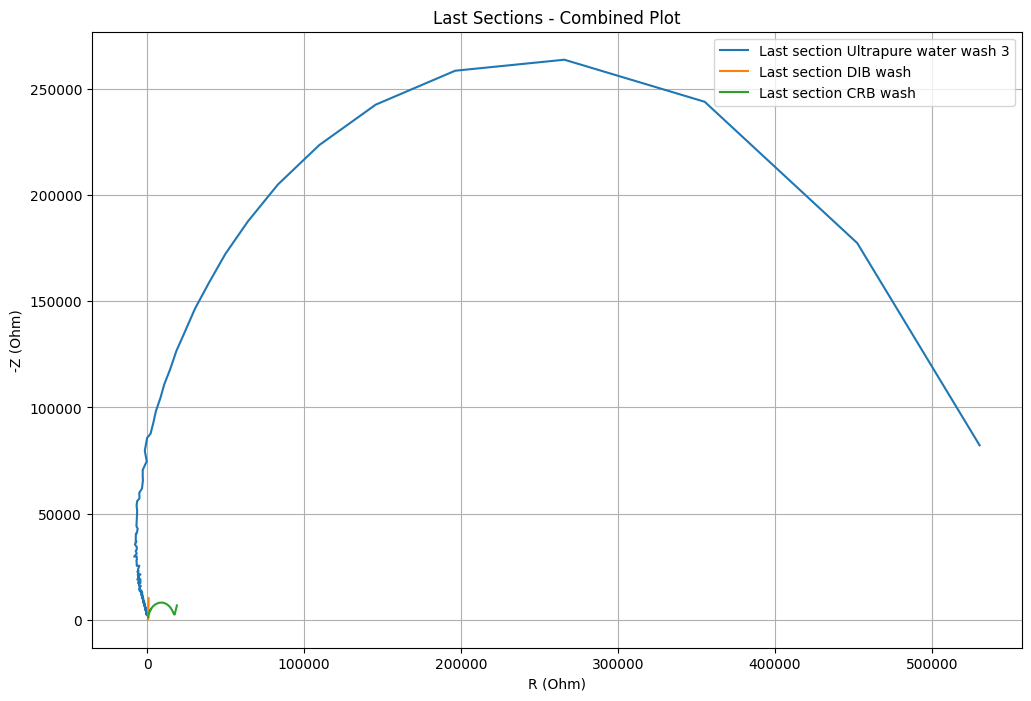

Saved combined plot for the last sections of all sheets.


In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tkinter import filedialog, Tk, Listbox, MULTIPLE, Button

# Function to manually load file
def manualloadfile():
    root = Tk()
    root.withdraw()  # Hide the root window
    root.filename = filedialog.askopenfilename(
        title="Select file", 
        filetypes=(("Excel files", "*.xlsx"),("all files", "*.*"))
    )
    root.destroy()
    return pd.ExcelFile(root.filename)

# Function to select sheets
def select_sheets(xls):
    root = Tk()
    root.title('Select Sheets')

    listbox = Listbox(root, selectmode=MULTIPLE)
    listbox.pack(padx=10, pady=10)

    for sheet in xls.sheet_names:
        listbox.insert(END, sheet)

    def on_select():
        global selected_sheets
        selected_sheets = [listbox.get(i) for i in listbox.curselection()]
        root.destroy()

    button = Button(root, text='Select', command=on_select)
    button.pack(pady=10)

    root.mainloop()

# Function to select output directory
def select_output_directory():
    root = Tk()
    root.withdraw()  # Hide the root window
    folder_selected = filedialog.askdirectory(title="Select output directory")
    root.destroy()
    return folder_selected

# Load the data
xls = manualloadfile()

# Select sheets
selected_sheets = []
select_sheets(xls)

# Select output directory
output_directory = select_output_directory()

# Define the default axis limits
default_limits = {'xlim': (0, 1500), 'ylim': (0, 5000)}

# Define the margin
margin = 10000

# To store the last sections for the combined plot
last_sections = []

# Loop through each selected sheet in the Excel file
for sheet_name in selected_sheets:
    # Read the sheet into a DataFrame
    df = pd.read_excel(xls, sheet_name)
    
    # Define sections based on frequency ranges (e.g., 100-200000 in increments)
    maxFrequency = 200000
    maxFreqIndices = df.loc[df['Frequency(Hz)'] == maxFrequency].index
    maxFreqIndices = maxFreqIndices.to_numpy()
    maxFreqIndices = np.append(0, maxFreqIndices)

    # Plot the last section
    last_section_df = df.iloc[maxFreqIndices[-2] + 1:maxFreqIndices[-1] + 1]

    # Initialize plot for the current sheet's last section
    plt.figure(figsize=(12, 8))
    
    # Plot the data for the last section
    plt.plot(last_section_df['Rs'], -last_section_df['X'], '-', label=f'Last section {sheet_name}')
    
    # Set plot labels and title
    plt.xlabel('R (Ohm)')
    plt.ylabel('-Z (Ohm)')
    plt.title(f'Last Section - {sheet_name}')
    plt.legend()
    plt.grid()    
    
    # Save the plot as an image
    plt.gcf().savefig(f'{output_directory}/{sheet_name}_last_section.jpeg', dpi=100)
    
    # Show the plot in the kernel
    plt.show()
    
    # Close the plot to free memory and avoid overlap
    plt.close()

    print(f'Saved plot for sheet: {sheet_name}')

    # Store the last section for the combined plot
    last_sections.append((sheet_name, last_section_df))

# Combined plot for the last sections of all sheets
plt.figure(figsize=(12, 8))

for sheet_name, section_df in last_sections:
    plt.plot(section_df['Rs'], -section_df['X'], '-', label=f'Last section {sheet_name}')
    
# Set combined plot labels and title
plt.xlabel('R (Ohm)')
plt.ylabel('-Z (Ohm)')
plt.title('Last Sections - Combined Plot')
plt.legend()
plt.grid()

# Save the combined plot as an image
plt.gcf().savefig(f'{output_directory}/combined_last_sections.jpeg', dpi=100)

# Show the combined plot in the kernel
plt.show()

print('Saved combined plot for the last sections of all sheets.')
